In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c={}
c['blue1']='tab:blue'
c['cobalt1']='darkblue'
c['blue10']='tab:blue'
c['cobalt10']='darkblue'
c['blue40']='tab:blue'
c['cobalt40']='darkblue'
c['random70']='tab:red'
c['cluster']='tab:green'
s={}
s['blast']='tab:brown'
s['psiblast']= 'tab:purple'
s['hmmsearch']= 'mediumvioletred'
s['diamond']= 'grey'
s['diamond-sen']= 'black'
s['diamond-s']= 'cyan'
t={}
t['blue1']='Blue 1'
t['cobalt1']='Cobalt 1'
t['blue10']='Blue 10'
t['cobalt10']='Cobalt 10'
t['blue40']='Blue 40'
t['cobalt40']='Cobalt 40'
t['random70']='Independent Selection'
t['cluster']='Cluster'
path="/n/home01/spetti/spetti_space/split_for_benchmarks/benchmarking_data/benchmarks/"

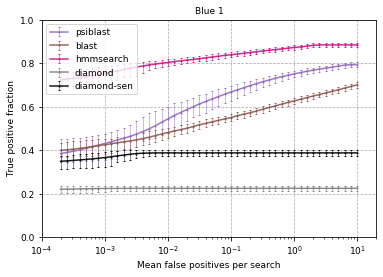

In [3]:
fs=9
algs=['blue1']

methods=['psiblast','blast','hmmsearch', 'diamond', 'diamond-sen']

plt.figure( )
for alg in algs:
    for method in methods:
        #x= np.loadtxt("./bdata/"+method+"/results_1/"+name+".xy", comments='&').T
        x=np.loadtxt(path+method+"/"+alg+".xy", comments='&').T
        plt.grid( linestyle='--', linewidth=.75)
        plt.errorbar(x[0],x[1], marker='o', yerr=[x[3],x[2]], ms=1, alpha=.9, capsize=.75, color=s[method], elinewidth=.5, label=method)
        plt.title(t[alg], fontsize=fs)
        plt.ylim(0,1)
        plt.xlim(1/10000,20)
        plt.xticks(fontsize=fs)
        plt.yticks(fontsize=fs)
        plt.xscale('log')
        plt.xlabel("Mean false positives per search", fontsize=fs)
        plt.ylabel("True positive fraction", fontsize=fs)
plt.legend(fontsize=fs)


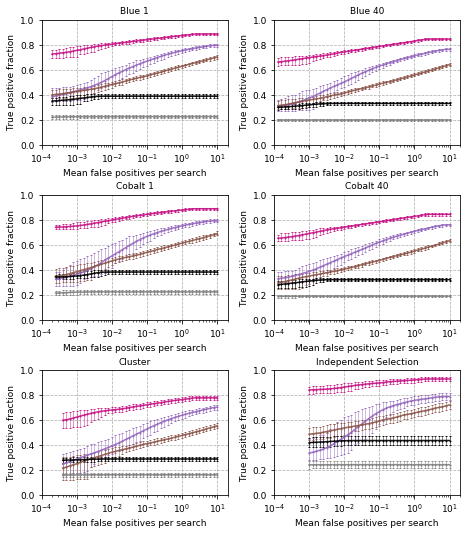

In [5]:
fs=9
algs=['blue1','blue40','cobalt1','cobalt40','cluster','random70']

methods=['psiblast','blast','hmmsearch', 'diamond', 'diamond-sen']

plt.figure( figsize=(7.5, 8.75))
plt.subplots_adjust(hspace=.4, wspace=.25)
i=1
for alg in algs:
    plt.subplot(320+i)
    i+=1
    for method in methods:
        #x= np.loadtxt("./bdata/"+method+"/results_1/"+name+".xy", comments='&').T
        x=np.loadtxt(path+method+"/"+alg+".xy", comments='&').T
        plt.grid( linestyle='--', linewidth=.75)
        plt.errorbar(x[0],x[1], marker='o', yerr=[x[3],x[2]], ms=1, alpha=.9, capsize=.75, color=s[method], elinewidth=.5, label=method)
        plt.title(t[alg], fontsize=fs)
        plt.ylim(0,1)
        plt.xlim(1/10000,20)
        plt.xticks(fontsize=fs)
        plt.yticks(fontsize=fs)
        plt.xscale('log')
        plt.xlabel("Mean false positives per search", fontsize=fs)
        plt.ylabel("True positive fraction", fontsize=fs)
#plt.legend(fontsize=fs)
plt.savefig("/n/home01/spetti/figures/methods.pdf")

In [4]:
def tt_dist_den(algs, folder):
    fs=9
    for alg in algs:
        maxes=[]
        c_fam=''
        with open(folder+"splits/"+alg+".pid", 'r') as fh:
            #column 0 family name
            #column 1 training seq
            #column 2 test seq
            #column 3 distance
            for y in fh.readlines():
                z=y.split()
                if z[0]!=c_fam:
                    if c_fam!='':
                        for k in dists.keys():
                            maxes.append(max(dists[k]))
                    dists={}
                    c_fam=z[0]
                if z[2] not in dists.keys():
                    dists[z[2]]=[float(z[3])]
                else:
                    dists[z[2]].append(float(z[3]))
  
        plt.hist(maxes, density=True, color= c[alg], histtype='step', lw=2, bins=np.arange(10,25, .5))
        plt.xlabel("PID with closest training sequence", fontsize=fs)
        plt.ylabel("Normalized count", fontsize=fs)
        plt.xticks(fontsize=fs)
        plt.yticks(fontsize=fs)


In [5]:
algs=['blue1','cobalt1', 'random70', 'cluster']
o_data={}
o_nf={}
for alg in algs:
    o_data[alg]= np.loadtxt(path+"hmmsearch/"+alg+".xy", comments='&').T
    o_nf[alg] = len(open(path+"splits/"+alg+".tbl").readlines())

t['random70']='Independent\nSelection'
data={}
nf={}
for alg in algs:
    data[alg]= np.loadtxt(path+"hmmsearch/common_results_4/"+alg+".xy", comments='&').T
    nf[alg] = len(open(path+"hmmsearch/common_results_4/"+alg+".tbl").readlines())

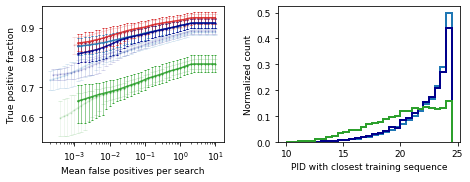

In [10]:
plt.figure( figsize=(7.5, 2.5))
plt.subplots_adjust( wspace=.3, hspace=1)
plt.tight_layout()
plt.subplot(121)

fs=9

for alg in algs:
    x=o_data[alg]
    plt.errorbar(x[0],x[1], marker='o', color=c[alg], yerr=[x[3],x[2]], ms=1, elinewidth=.5, alpha=.15, capsize=2)
    x=data[alg]
    plt.errorbar(x[0],x[1], marker='o', color=c[alg], yerr=[x[3],x[2]], ms=1, elinewidth=.5, alpha=.9, capsize=1, label=t[alg]+' ('+str(nf[alg])+')')
plt.xscale('log')
plt.xlabel("Mean false positives per search", fontsize=fs)
plt.ylabel("True positive fraction",fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#plt.show()
#plt.subplot(122)
#tt_dist_den(['blue1', 'cobalt1', 'cluster'], ['25'], '/n/home01/spetti/spetti_space/benchmarking/splits/cross/')

plt.subplot(122)
tt_dist_den(['blue1', 'cobalt1', 'cluster'],path)
plt.savefig("/n/home01/spetti/figures/restricted_and_pid.pdf",bbox_inches = "tight")


In [7]:
#number of families split by all algorithms
nf['blue1']

708

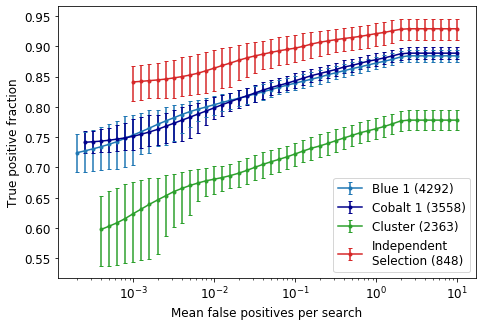

In [8]:
fs=12
algs=['blue1','cobalt1',  'cluster','random70']
plt.figure( figsize=(7.5, 5))
for alg in algs:
    x=o_data[alg]
    plt.errorbar(x[0],x[1], marker='o', color=c[alg], yerr=[x[3],x[2]], ms=3, capsize=2, label=t[alg]+' ('+str(o_nf[alg])+')')
    plt.legend(fontsize=fs)
    plt.xscale('log')
    plt.xlabel("Mean false positives per search", fontsize=fs)
    plt.ylabel("True positive fraction",fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    #plt.show()
    plt.savefig("/n/home01/spetti/figures/hmmsearch.pdf")